# Sequencing depth v.s. unique molecule captured

In [1]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
plt.rcParams['pdf.fonttype'] = 42
indir='/home/hsher/scratch/eric_rbfox2_293t_snake/downsample_bam_UMI_counts/'
files = os.listdir(indir)


In [2]:
totaldir='/home/hsher/scratch/eric_rbfox2_293t_snake/downsample_bam_UMI/'
totalfiles = [os.path.join(totaldir,f) for f in os.listdir(totaldir) if f.endswith('totalcount')]


In [3]:
totalreads = []
for f in totalfiles:
    id_=os.path.basename(f).replace('.totalcount', '')
    with open(f, 'r') as f:
        nreads = int(f.readlines()[0].rstrip())
        totalreads.append([id_, nreads])

In [4]:
totalreads = pd.DataFrame(totalreads, columns = ['lib', 'total_reads'])

In [5]:
totalreads['lib'].unique()

array(['Dan_multiplex1_K562_rep2_RBFOX2', '676_01_RBFOX2-A04',
       'Katie_RBFOX2_rep2', 'katieoligo_RBFOX2_rep2',
       'Dan_singleplex_RBFOX2_rep1', 'Dan_singleplex_K562_rep1_RBFOX2',
       'Dan_multiplex1_HEK293_rep1_RBFOX2',
       'Dan_multiplex1_K562_rep4_RBFOX2', 'ENCODE_RBFOX2_rep1',
       'Dan_multiplex1_K562_rep3_RBFOX2', '676_02_RBFOX2-G07',
       'Dan_singleplex_HEK293_rep1_RBFOX2',
       'Dan_multiplex1_K562_rep5_RBFOX2',
       'Dan_multiplex1_K562_rep6_RBFOX2',
       'Dan_singleplex_HEK293_rep2_RBFOX2', 'Katie_RBFOX2_rep1',
       'Dan_singleplex_RBFOX2_rep2', 'katieoligo_RBFOX2_rep1',
       '676_01_RBFOX2-F05', 'katieoligo_RBFOX2_rep4',
       'Dan_multiplex1_K562_rep1_RBFOX2', 'ENCODE_RBFOX2_rep2',
       '676_02_RBFOX2-A03', 'katieoligo_RBFOX2_rep3',
       'Dan_multiplex1_HEK293_rep2_RBFOX2',
       'Dan_singleplex_K562_rep2_RBFOX2'], dtype=object)

In [6]:
data = []
for f in files:
    lib = f.split('.')[0]
    nread = int(f.split('.')[1])
    with open(os.path.join(indir, f), 'r') as f:
        usable_read = int(f.readlines()[0].rstrip())
    data.append([lib, nread, usable_read])

In [7]:

df = pd.DataFrame(data, columns = ['lib', 'n_mapped', 'n_usable'])
#df = df.loc[(df['n_usable']>0) & (df['n_mapped']<6000000)]

In [8]:
df.loc[df['lib'].str.contains('676')]

,lib,n_mapped,n_usable
5,676_01_RBFOX2-F05,100000000,5429697
12,676_01_RBFOX2-A04,1000000,248531
17,676_02_RBFOX2-A03,5000000,1170257
34,676_01_RBFOX2-F05,2000000,495407
38,676_01_RBFOX2-A04,50000000,1101550
39,676_02_RBFOX2-G07,2000000,464295
40,676_01_RBFOX2-A04,100000000,2143104
48,676_01_RBFOX2-F05,5000000,1217467
52,676_02_RBFOX2-G07,5000000,1047127
66,676_02_RBFOX2-G07,50000000,719854


In [9]:
df.sort_values(by = 'n_mapped')

,lib,n_mapped,n_usable
30,Dan_multiplex1_K562_rep4_RBFOX2,500000,358557
121,Dan_singleplex_RBFOX2_rep2,500000,235193
83,katieoligo_RBFOX2_rep2,500000,500503
77,Dan_singleplex_K562_rep1_RBFOX2,500000,500159
124,katieoligo_RBFOX2_rep4,500000,121643
...,...,...,...
40,676_01_RBFOX2-A04,100000000,2143104
154,676_02_RBFOX2-A03,100000000,2347691
89,katieoligo_RBFOX2_rep2,100000000,811937
82,Dan_singleplex_K562_rep2_RBFOX2,100000000,172471


In [10]:
df = df.merge(totalreads)
df = df.loc[df['total_reads']>df['n_mapped']]

In [11]:
igf1 = pd.read_excel('IGF2BP1.xlsx', engine='openpyxl')
igf1  = igf1[['Unnamed: 0', 'eCLIP Rep1', 'eCLIP Rep2', 'iCLIP Rep1', 'iCLIP Rep2', 'iCLIP Rep3', 'iCLIP Rep4', 'iCLIP Rep5']].iloc[2:]
igf1.set_index('Unnamed: 0', inplace = True)

In [12]:

rbfox = pd.read_excel('RBFOX2.xlsx', engine='openpyxl')
rbfox = rbfox[['Unnamed: 0', 'eCLIP Rep1', 'eCLIP Rep2', 'iCLIP']].iloc[2:]
rbfox.set_index('Unnamed: 0', inplace = True)

In [13]:
# merge 2 barcodes
encode_k562_rbfox = df.loc[df['lib'].str.contains('676')]
encode_k562_rbfox['name'] = encode_k562_rbfox['lib'].str.split('-', expand = True)[0]
both_exist = encode_k562_rbfox.groupby(by = ['name', 'n_mapped']).count().reset_index()[['name', 'n_mapped','lib']]
both_exist.columns = ['name', 'n_mapped','count']
encode_k562_rbfox = encode_k562_rbfox.groupby(by = ['name', 'n_mapped'])['n_usable'].sum().reset_index()
both_exist = both_exist.merge(encode_k562_rbfox, left_on = ['name', 'n_mapped'], right_on = ['name', 'n_mapped'])
both_exist = both_exist.loc[both_exist['count']==2][['name', 'n_mapped','n_usable']]
both_exist.columns = ['lib', 'n_mapped','n_usable']


/home/hsher/miniconda3/envs/Metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df.drop(index = df.loc[df['lib'].str.contains('676')].index, inplace = True)
df = pd.concat([df, both_exist], axis = 0)

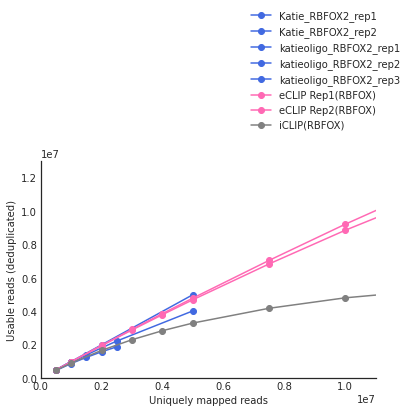

In [15]:
f, ax = plt.subplots()
hek_columns = [i for i in df['lib'].unique() if 'katie' in i.lower()]

for name, group in df.groupby(by = 'lib'):
    if name in hek_columns:
        #print(group)
        if 'Dan' in name:
            if 'singleplex' in name:
                c1 = 'gold'
            else:
                if 'HEK' in name:
                    c1 = 'goldenrod'
                else:
                    c1 = 'orange'
        if 'Katie' in name:
            c1 = 'royalblue'
        elif '676' in name:
            c1 = 'hotpink'
        group.sort_values(by = 'n_mapped').plot(x = 'n_mapped', y = 'n_usable', marker = 'o', ax = ax, label = name, color = c1)
for lib in rbfox.columns:
    if 'eCLIP' in lib:
        c1 = 'hotpink'
    else:
        c1 = 'grey'
    ax.plot(rbfox.index, rbfox[lib], label = lib + '(RBFOX)', color = c1, marker = 'o')
plt.legend(bbox_to_anchor = (1.1, 1.1))
plt.ylabel('Usable reads (deduplicated)')
plt.xlabel('Uniquely mapped reads')
plt.xlim(0, df['n_mapped'].max()*1.1)
plt.ylim(0, df['n_usable'].max()*1.3)
sns.despine()
plt.savefig(os.path.join('/home/hsher/scratch/oligofig/', 'UMI.pdf'))

In [16]:
df.loc[df['lib']=='Dan_singleplex_RBFOX2_rep2']

,lib,n_mapped,n_usable,total_reads
0,Dan_singleplex_RBFOX2_rep2,1000000,306929,3611341.0
2,Dan_singleplex_RBFOX2_rep2,1500000,342038,3611341.0
4,Dan_singleplex_RBFOX2_rep2,2500000,378456,3611341.0
5,Dan_singleplex_RBFOX2_rep2,500000,235193,3611341.0
7,Dan_singleplex_RBFOX2_rep2,2000000,363363,3611341.0


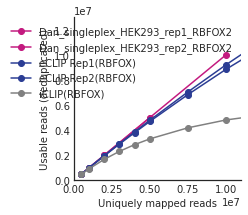

In [17]:

f, ax = plt.subplots(figsize = (3,3))
hek_columns = [i for i in df['lib'].unique() if 'Dan' in i and 'HEK' in i and 'single' in i.lower()]

for name, group in df.groupby(by = 'lib'):
    if name in hek_columns:
        #print(group)
        if 'Dan' in name:
            if 'singleplex' in name:
                c1 = '#c31a7f'
                if 'rep2' in name:
                    c1 = '#c31a7f'
            else:
                if 'HEK' in name:
                    c1 = 'goldenrod'
                else:
                    c1 = 'orange'
        if 'Katie' in name:
            c1 = 'royalblue'
        elif '676' in name:
            c1 = 'hotpink'
        group.sort_values(by = 'n_mapped').plot(x = 'n_mapped', y = 'n_usable', marker = 'o', ax = ax, label = name, color = c1)
for lib in rbfox.columns:
    if 'eCLIP' in lib:
        c1 = '#2b3d94'
    else:
        c1 = 'grey'
    ax.plot(rbfox.index, rbfox[lib], label = lib + '(RBFOX)', color = c1, marker = 'o')
plt.legend()
plt.ylabel('Usable reads (deduplicated)')
plt.xlabel('Uniquely mapped reads')
plt.xlim(0, df['n_mapped'].max()*1.1)
plt.ylim(0, df['n_usable'].max()*1.3)
sns.despine()
plt.savefig(os.path.join('/home/hsher/scratch/oligofig/', 'UMI_dan_singleplex.pdf'))

(4, 4) 676_01_RBFOX2
(2, 4) 676_02_RBFOX2
(5, 4) Dan_singleplex_RBFOX2_rep1
(5, 4) Dan_singleplex_RBFOX2_rep2


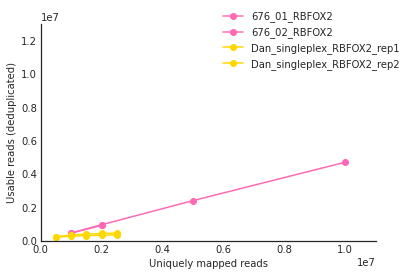

In [18]:
f, ax = plt.subplots()
k562_columns = ['Dan_singleplex_RBFOX2_rep2',
 'Dan_singleplex_RBFOX2_rep1',
 '676_01_RBFOX2',
 '676_02_RBFOX2']

for name, group in df.groupby(by = 'lib'):
    if name in k562_columns:
        print(group.shape, name)
        if 'Dan' in name:
            if 'singleplex' in name:
                c1 = 'gold'
            else:
                if 'HEK' in name:
                    c1 = 'goldenrod'
                else:
                    c1 = 'orange'
        if 'Katie' in name:
            c1 = 'royalblue'
        elif '676' in name:
            c1 = 'hotpink'
        group.sort_values(by = 'n_mapped').plot(x = 'n_mapped', y = 'n_usable', marker = 'o', ax = ax, label = name, color = c1)
plt.legend(bbox_to_anchor = (1.1, 1.1))
plt.ylabel('Usable reads (deduplicated)')
plt.xlabel('Uniquely mapped reads')
plt.xlim(0, df['n_mapped'].max()*1.1)
plt.ylim(0, df['n_usable'].max()*1.3)
sns.despine()
plt.savefig(os.path.join('/home/hsher/scratch/oligofig/', 'UMI_k562_singleplex.pdf'))

(4, 4) 676_01_RBFOX2
(2, 4) 676_02_RBFOX2
(7, 4) Dan_multiplex1_K562_rep4_RBFOX2
(6, 4) Dan_multiplex1_K562_rep6_RBFOX2


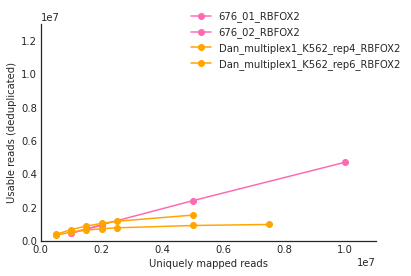

In [19]:
f, ax = plt.subplots()

k562_m_columns = ['Dan_multiplex1_K562_rep4_RBFOX2',
 'Dan_multiplex1_K562_rep6_RBFOX2',
 '676_01_RBFOX2',
 '676_02_RBFOX2']

for name, group in df.groupby(by = 'lib'):
    if name in k562_m_columns:
        print(group.shape, name)
        if 'Dan' in name:
            if 'singleplex' in name:
                c1 = 'gold'
            else:
                if 'HEK' in name:
                    c1 = 'goldenrod'
                else:
                    c1 = 'orange'
        if 'Katie' in name:
            c1 = 'royalblue'
        elif '676' in name:
            c1 = 'hotpink'
        group.sort_values(by = 'n_mapped').plot(x = 'n_mapped', y = 'n_usable', marker = 'o', ax = ax, label = name, color = c1)
plt.legend(bbox_to_anchor = (1.1, 1.1))
plt.ylabel('Usable reads (deduplicated)')
plt.xlabel('Uniquely mapped reads')
plt.xlim(0, df['n_mapped'].max()*1.1)
plt.ylim(0, df['n_usable'].max()*1.3)
sns.despine()
plt.savefig(os.path.join('/home/hsher/scratch/oligofig/', 'UMI_k562_multiplex.pdf'))

(6, 4) Dan_multiplex1_HEK293_rep1_RBFOX2
(7, 4) Dan_multiplex1_HEK293_rep2_RBFOX2


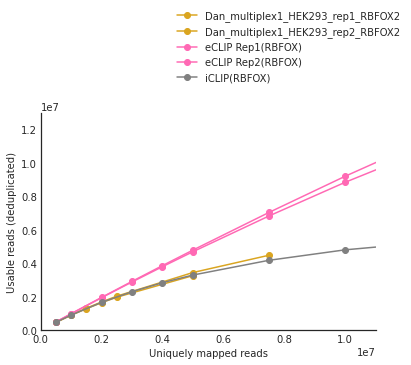

In [20]:
f, ax = plt.subplots()
hek_columns = ['Dan_multiplex1_HEK293_rep2_RBFOX2',
 'Dan_multiplex1_HEK293_rep1_RBFOX2']

for name, group in df.groupby(by = 'lib'):
    if name in hek_columns:
        print(group.shape, name)
        if 'Dan' in name:
            if 'singleplex' in name:
                c1 = 'gold'
            else:
                if 'HEK' in name:
                    c1 = 'goldenrod'
                else:
                    c1 = 'orange'
        if 'Katie' in name:
            c1 = 'royalblue'
        elif '676' in name:
            c1 = 'hotpink'
        group.sort_values(by = 'n_mapped').plot(x = 'n_mapped', y = 'n_usable', marker = 'o', ax = ax, label = name, color = c1)

for lib in rbfox.columns:
    if 'eCLIP' in lib:
        c1 = 'hotpink'
    else:
        c1 = 'grey'
    ax.plot(rbfox.index, rbfox[lib], label = lib + '(RBFOX)', color = c1, marker = 'o')
plt.legend(bbox_to_anchor = (1.1, 1.1))
plt.ylabel('Usable reads (deduplicated)')
plt.xlabel('Uniquely mapped reads')
plt.xlim(0, df['n_mapped'].max()*1.1)
plt.ylim(0, df['n_usable'].max()*1.3)
sns.despine()
plt.savefig(os.path.join('/home/hsher/scratch/oligofig/', 'UMI_hek_multiplex.pdf'))